## Update Stop Words

In [1]:
from sklearn.feature_extraction import text 

text.ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [2]:
# add network, host names
add_stop_words_c = ['tucker', 'carlson', 'fox', 'news', 'five', 
                'greg', 'gutfeld', 'dana', 'perino', 'jesse', 'watters', 
                'jeanine', 'pirro', 'geraldo', 'rivera', 'jessica', 'tarlov',
                'harold', 'ford', 'jr', 'ok', 'williams',  'pavlich', 
                'mcdowell', 'juan', 'thanks', 'crosstalk', 'unidentified',
                 'video', 'clip', 'voiceover', 'videotape']

In [3]:
# add custom words to the English set
full_stop_words_c = text.ENGLISH_STOP_WORDS.union(add_stop_words_c)

## Define COVID terms
Define groups of terms referring to COVID, vaccines, masks

In [4]:
# covid terms -- Lori added sars, sars-, sars-cov-2
covid_terms = ['coronavirus', 'covid', 'covid-19', 'covid-', 
                'covid19', 'virus', 'sars', 'sars-', 'sars-cov-2']

# vaccine terms -- Lori added pfizer, moderna, johnson
vaccine_terms = ['vaccine', 'vaccination', 'vaccinated', 'mrna', 'booster', 'vax', 'vaxx', 
                'vaxxed', 'pfizer', 'moderna', 'johnson']

# mask terms -- Lori added n95 and kn95
mask_terms = ['mask', 'masking', 'n95', 'kn95']

# other COVID-related terms (can choose to use or not)
other_terms = ['china', 'wuhan', 'mandate', 'pandemic', 'epidemic', 'virus',
                'distancing', 'spread', 'immunity', 'incubation', 'quarantine']

all_covid_terms = covid_terms + other_terms

## Load Data

In [5]:
#import libraries
import glob 
import os
import matplotlib.pyplot as plt
import numpy as np
import string
import re

#step 1: get a list of file names to read into the dataset
repo_path = os.path.dirname(os.getcwd()) #get the correct file path 
tc_paths = glob.glob(repo_path + "/data/01-raw/tucker_carlson/*.txt") #the paths for the tucker carlson transcript files
tf_paths = glob.glob(repo_path + '/data/01-raw/the_five/*.txt') #the paths for the five transcript files

all_conservative_files = tc_paths + tf_paths #all conservative transcripts

## Read files, clean text, store cleaned transcripts and sentences

In [6]:
text_transcripts_c = [] # container for transcript text
text_sentences_c = [] # container for sentence text
covid_counts_transcripts_c = [] # container for transcript covid mention counts
covid_counts_sentences_c = [] # container for sentence covid mention counts

# read in each transcript, do text cleaning, add text and counts to containers
# split sentences on periods, do text cleaning, add text and counts to containers
# text cleaning is done separately for transcripts and sentences to help split sentences better

#### transcripts as documents
for transcript in all_conservative_files:
    
    # create transcript covid counter
    cov_trans_counter_c = 0
    
    # read text
    text_c = open(transcript, encoding = 'utf-8', errors = 'ignore').read().lower()  # Lori ignored a few characters that were not ASCII
    
    ### string cleaning
    # line below replaces periods with spaces because spaces after periods are often missing, then strips extra spaces
    corpus_text_c = text_c.replace('\xa0', '').replace('.', ' ').replace('  ', ' ')
    # remove all punctuation
    for c in string.punctuation:
        corpus_text_c = corpus_text_c.replace(c, "")
    # remove numbers
    corpus_text_c = re.sub('\d+', '', corpus_text_c)
    # remove whitespaces
    corpus_text_c = " ".join(corpus_text_c.split())
    
    # add cleaned text to container
    text_transcripts_c.append(corpus_text_c)
    
    # add to counter if word in text is in covid terms, add count to container
    for word in corpus_text_c.split(' '):
        if word in covid_terms:
            cov_trans_counter_c += 1
    covid_counts_transcripts_c.append(cov_trans_counter_c)
    
    
    #### sentences as documents
    for sentence in text_c.split('.'): # note that splitting on periods is not perfect for identifying sentences
        
        # create sentence covid counter
        cov_sen_counter_c = 0
        
        ### string cleaning
        corpus_sen_c = sentence.replace('\xa0', '')
        # remove all punctuation    
        for c in string.punctuation:
            corpus_sen_c = corpus_sen_c.replace(c, "")
        # remove numbers            
        corpus_sen_c = re.sub('\d+', '', corpus_sen_c)
        # remove whitespaces
        corpus_sen_c = " ".join(corpus_sen_c.split())
        
        # add cleaned sentence to container
        text_sentences_c.append(corpus_sen_c)
        
        # add to counter if word in sentence is in covid terms, add count to container
        for word in corpus_sen_c.split(' '):
            if word in covid_terms:
                cov_sen_counter_c += 1
        covid_counts_sentences_c.append(cov_sen_counter_c)  

In [7]:
# display simple counts
print("Our conservative news corpus consists of {:,} total transcripts, sourced from Tucker Carlson Tonight and The Five.".format(len(text_transcripts_c)))

print("There are {:,} total sentences in the corpus.".format(len(text_sentences_c)))

print("There are {:,} transcripts that mention COVID at least once.".format(len(text_transcripts_c) - covid_counts_transcripts_c.count(0)))

Our conservative news corpus consists of 458 total transcripts, sourced from Tucker Carlson Tonight and The Five.
There are 254,010 total sentences in the corpus.
There are 434 transcripts that mention COVID at least once.


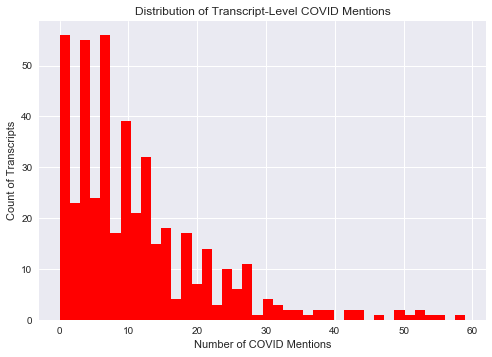

In [8]:
# Distribution of COVID mentions - transcripts
plt.style.use('seaborn')  

plt.hist(covid_counts_transcripts_c, bins = 40, color = 'red')
plt.xlabel('Number of COVID Mentions')
plt.ylabel('Count of Transcripts')
plt.title('Distribution of Transcript-Level COVID Mentions')

plt.show()

## Read in Data for Year-Specific Datasets

In [9]:
text_transcripts_c_2020 = [] # container for transcript text
text_transcripts_c_2021 = [] # container for transcript text
text_transcripts_c_2022 = [] # container for transcript text

covid_counts_transcripts_c_2020 = [] # container for transcript covid mention counts
covid_counts_transcripts_c_2021 = [] # container for transcript covid mention counts
covid_counts_transcripts_c_2022 = [] # container for transcript covid mention counts


# read in each transcript, do text cleaning, add text and counts to containers
# split sentences on periods, do text cleaning, add text and counts to containers
# text cleaning is done separately for transcripts and sentences to help split sentences better

#### transcripts as documents
for transcript in all_conservative_files:

    # create transcript covid counter
    cov_trans_counter_c = 0
    
    # read text
    text_c = open(transcript, encoding = 'utf-8', errors = 'ignore').read().lower()
    
    ## string cleaning
    # line below replaces periods with spaces because spaces after periods are often missing, then strips extra spaces
    corpus_text_c = text_c.replace('\xa0', '').replace('.', ' ').replace('  ', ' ')
    # remove all punctuation
    for c in string.punctuation:
        corpus_text_c = corpus_text_c.replace(c, "")
    # remove numbers
    corpus_text_c = re.sub('\d+', '', corpus_text_c)
    # remove whitespaces
    corpus_text_c = " ".join(corpus_text_c.split())

     # add to counter if word in text is in covid terms, add count to container
    for word in corpus_text_c.split(' '):
        if word in covid_terms:
            cov_trans_counter_c += 1
   
    
    if "2020" in transcript:
        # add cleaned text to container
        text_transcripts_c_2020.append(corpus_text_c)
        covid_counts_transcripts_c_2020.append(cov_trans_counter_c)
    
    elif "2021" in transcript:
        text_transcripts_c_2021.append(corpus_text_c)
        covid_counts_transcripts_c_2021.append(cov_trans_counter_c)

    else: 
        text_transcripts_c_2022.append(corpus_text_c)
        covid_counts_transcripts_c_2022.append(cov_trans_counter_c)


In [10]:
print("There are {} transcripts from 2020, {} from 2021, and {} from 2022".format(len(text_transcripts_c_2020), len(text_transcripts_c_2021), len(text_transcripts_c_2022) ))


There are 147 transcripts from 2020, 271 from 2021, and 40 from 2022


In [11]:
# Lori -- Looked for COVID term counts again using a wider list of terms

all_covid_counts_transcripts_c = [] # container for transcript covid mention counts
all_covid_counts_sentences_c = [] # container for sentence covid mention counts

# read in each transcript, do text cleaning, add text and counts to containers
# split sentences on periods, do text cleaning, add text and counts to containers
# text cleaning is done separately for transcripts and sentences to help split sentences better

#### transcripts as documents
for transcript in all_conservative_files: 
    # add to counter if word in text is in the combined covid terms list, add count to container
    for word in corpus_text_c.split(' '):
        if word in all_covid_terms:
            cov_trans_counter_c += 1
    all_covid_counts_transcripts_c.append(cov_trans_counter_c)
    
    
    #### sentences as documents
    for sentence in text_c.split('.'): # note that splitting on periods is not perfect for identifying sentences
        
        # create sentence covid counter
        cov_sen_counter_c = 0
        
        ### string cleaning
        corpus_sen_c = sentence.replace('\xa0', '')
        # remove all punctuation    
        for c in string.punctuation:
            corpus_sen_c = corpus_sen_c.replace(c, "")
        # remove numbers            
        corpus_sen_c = re.sub('\d+', '', corpus_sen_c)
        # remove whitespaces
        corpus_sen_c = " ".join(corpus_sen_c.split())
        
        # add cleaned sentence to container
        text_sentences_c.append(corpus_sen_c)
        
        # add to counter if word in sentence is in covid terms, add count to container
        for word in corpus_sen_c.split(' '):
            if word in all_covid_terms:
                cov_sen_counter_c += 1
        all_covid_counts_sentences_c.append(cov_sen_counter_c) 

In [12]:
# might be too wide, because now all transcripts are included

print("There are {:,} transcripts that mention COVID at least once.".format(len(text_transcripts_c) - all_covid_counts_transcripts_c.count(0)))

There are 458 transcripts that mention COVID at least once.


## Data Pre-Processing

### Spacy Implementation & Removal of Stop Words 
This analysis is useful if we want more control over the corpus of stop words that are used in our analysis

In [13]:
#Compare spacy implemtation to the sklearn #loads spacy and turns off some aspects 
# import spacy
# nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

## Word-Frequency Analysis

### Use CountVectorizer to get the unique vocabulary list and eliminate stop words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from operator import itemgetter

In [15]:
# set up count vectorizer function
def countvec_c(text_list):
    
    # step 1: set up the vectorizer
    vectorizer = CountVectorizer(min_df = 30, 
                                 stop_words = full_stop_words_c, 
                                 max_df = 0.8)
    
    # step 2: apply the vectorizer to the corpus of documents and store in document matrix X
    X = vectorizer.fit(text_list)
    
    # step 3: fit transform corpus of documents
    X_transformed = vectorizer.fit_transform(text_list)
    
    # step 4: extract feature names and counts, create dictionary
    array_of_words = vectorizer.get_feature_names() # Lori changed from get_featured_names_out() because her version of library doesn't have that function
    array_of_counts = X_transformed.toarray().sum(axis = 0)
    word_frequency_dictionary = dict(zip(array_of_words, array_of_counts))
    
    return(X, X_transformed, array_of_words, array_of_counts, word_frequency_dictionary)

## Apply CountVectorizer and Plot Top Words
Note: need to double-check how the counts are arrived at - is it by document or number of occurences in a given document?

### Full Transcript Set

In [16]:
# apply function to full transcript set
X_trans_c, X_transformed_trans_c, array_of_words_trans_c, array_of_counts_trans_c, word_frequency_dictionary_trans_c = countvec_c(text_transcripts_c)

In [17]:
# vocabulary length
print("There are {:,} unique words in the vocabulary.".format(len(X_trans_c.vocabulary_)))

There are 4,075 unique words in the vocabulary.


In [18]:
# set number of top words to see
num_top_words = 10

top_10_words_c = dict(sorted(word_frequency_dictionary_trans_c.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words_c)

{'police': 2669, 'administration': 1647, 'kids': 1617, 'school': 1612, 'black': 1605, 'quote': 1566, 'vaccine': 1556, 'china': 1511, 'crime': 1501, 'border': 1475}


In [19]:
#check to see if "coronavirus" is in the dictionary, print index value
vocab_c = X_trans_c.vocabulary_

vocab_c['coronavirus']

814

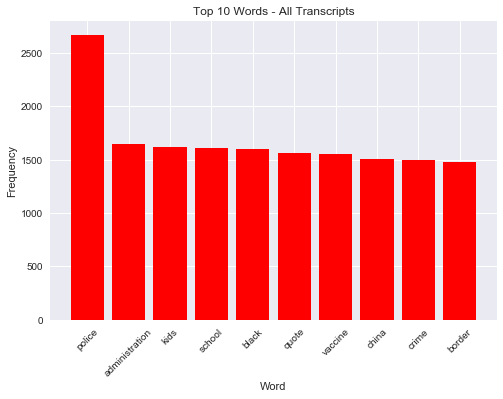

In [20]:
# plot top words
plt.style.use('seaborn')  

x_c = top_10_words_c.keys()
y_c = top_10_words_c.values()
plt.bar(x_c, y_c, color = 'red')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 Words - All Transcripts')

plt.show()

### Restricted Transcript Set - Nonzero COVID Mentions

In [21]:
# create a restricted transcript list including only transcripts that mention a COVID term at least one
text_trans_cov_c = [text_transcripts_c[i] for i in range(len(text_transcripts_c)) if covid_counts_transcripts_c[i] > 0]

In [22]:
# apply function to restricted list
X_trans_cov_c, X_transformed_trans_cov_c, array_of_words_trans_cov_c, array_of_counts_trans_cov_c, word_frequency_dictionary_trans_cov_c = countvec_c(text_trans_cov_c)

In [23]:
# vocabulary length
print("There are {:,} unique words in the vocabulary.".format(len(X_trans_cov_c.vocabulary_)))

There are 3,911 unique words in the vocabulary.


In [24]:
# check to see if "coronavirus" is in the dictionary, print index
vocab_c = X_trans_cov_c.vocabulary_

vocab_c['coronavirus']

787

In [25]:
# set the number of top words
num_top_words = 10

top_10_words_c = dict(sorted(word_frequency_dictionary_trans_cov_c.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words_c)

{'police': 2520, 'school': 1574, 'kids': 1553, 'vaccine': 1552, 'black': 1512, 'quote': 1495, 'china': 1463, 'crime': 1441, 'coronavirus': 1408, 'border': 1378}


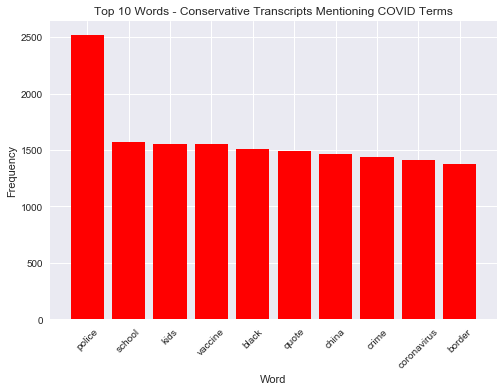

In [26]:
# plot top words
plt.style.use('seaborn')  

x_c = top_10_words_c.keys()
y_c = top_10_words_c.values()
plt.bar(x_c, y_c, color = 'red')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 Words - Conservative Transcripts Mentioning COVID Terms')

plt.show()

In [27]:
# Lori expanded number of top words to see if that increased number of COVID terms in results.
num_top_words = 20

top_20_words_c = dict(sorted(word_frequency_dictionary_trans_cov_c.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_20_words_c)

{'police': 2520, 'school': 1574, 'kids': 1553, 'vaccine': 1552, 'black': 1512, 'quote': 1495, 'china': 1463, 'crime': 1441, 'coronavirus': 1408, 'border': 1378, 'shes': 1371, 'mask': 1364, 'health': 1332, 'children': 1221, 'virus': 1213, 'federal': 1171, 'governor': 1165, 'fauci': 1152, 'dr': 1137, 'republicans': 1128}


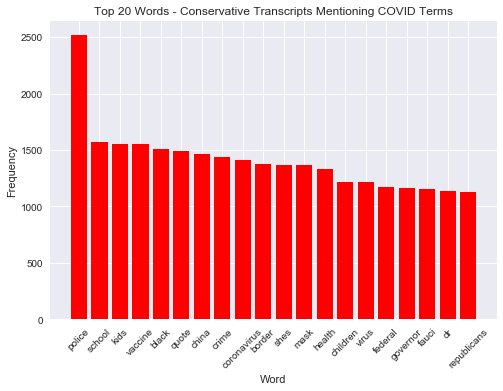

In [28]:
# Lori also plotted top 20 words
plt.style.use('seaborn')  

x_c = top_20_words_c.keys()
y_c = top_20_words_c.values()
plt.bar(x_c, y_c, color = 'red')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 20 Words - Conservative Transcripts Mentioning COVID Terms')

plt.show()

### Full Sentence Set

Lori didn't run this part because her computer didn't have enough memory!

In [29]:
# apply function to sentences -- Lori getting a memory error because she only has 8 GiB of RAM on her computer: 
# Unable to allocate 22.2 GiB for an array with shape (525604, 5676) and data type int64
X_sen_c, X_transformed_sen_c, array_of_words_sen_c, array_of_counts_sen_c, word_frequency_dictionary_sen_c = countvec_c(text_sentences_c)

MemoryError: Unable to allocate 22.2 GiB for an array with shape (525604, 5670) and data type int64

In [ ]:
#check to see if "coronavirus" is in the dictionary, print index
vocab_c = X_sen_c.vocabulary_

vocab_c['coronavirus']

1140

In [ ]:
#set the number of top words to see
num_top_words = 10

top_10_words_c = dict(sorted(word_frequency_dictionary_sen_c.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words_c)

{'going': 36675, 'know': 36562, 'think': 35598, 'people': 31503, 'thats': 26871, 'just': 26800, 'dont': 26353, 'like': 26325, 'want': 23386, 'president': 21341}


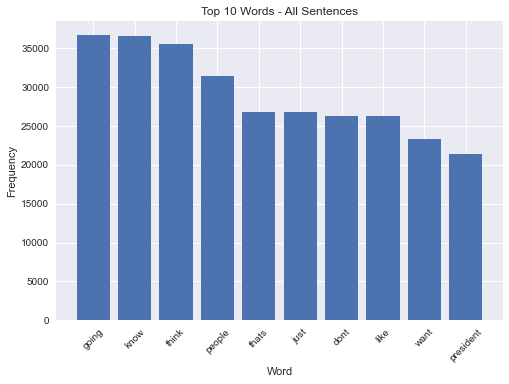

In [ ]:
# plot top words
plt.style.use('seaborn')  

x_c = top_10_words_c.keys()
y_c = top_10_words_c.values()
plt.bar(x_c, y_c, color = 'red')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 Words - Conservative, All Sentences')

plt.show()

### Restricted Sentence Set - Nonzero COVID Mentions

In [ ]:
# create a restricted transcript list including only transcripts that mention a COVID term at least once
text_sen_cov_c = [text_sentences_c[i] for i in range(len(text_sentences_c)) if covid_counts_sentences_c[i] > 0]

IndexError: list index out of range

In [ ]:
# apply function to restricted list
X_sen_cov_c, X_transformed_sen_cov_c, array_of_words_sen_cov_c, array_of_counts_sen_cov_c, word_frequency_dictionary_sen_cov_c = countvec_c(text_sen_cov_c)

In [ ]:
# vocabulary length
print("There are {:,} unique words in the vocabulary.".format(len(X_sen_cov_c.vocabulary_)))

There are 292 unique words in the vocabulary.


In [ ]:
# check to see if "coronavirus" is in the dictionary, print index
vocab_c = X_sen_cov_c.vocabulary_

vocab_c['coronavirus']

45

In [ ]:
# set the number of top words to see
num_top_words = 10

top_10_words_c = dict(sorted(word_frequency_dictionary_sen_cov_c.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words_c)

{'covid': 2537, 'coronavirus': 1408, 'virus': 1213, 'people': 829, 'know': 481, 'going': 370, 'just': 360, 'new': 318, 'like': 315, 'think': 314}


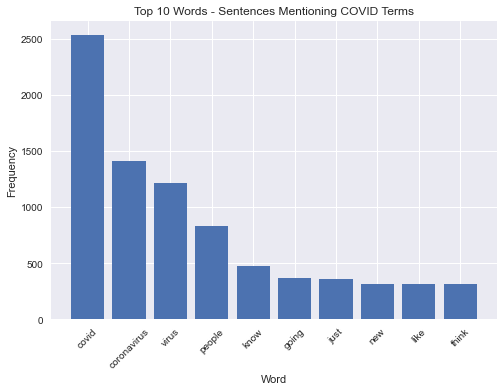

In [ ]:
# plot top words
plt.style.use('seaborn')  

x_c = top_10_words_c.keys()
y_c = top_10_words_c.values()
plt.bar(x_c, y_c, color = 'red')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 Words - Conservative Sentences Mentioning COVID Terms')

plt.show()

### Year-Restricted Datasets

In [30]:
# apply function to different year-restricted datasets
X_c_2020, X_transformed_c_2020, array_of_words_c_2020, array_of_counts_c_2020, word_frequency_dictionary_c_2020 = countvec_c(text_transcripts_c_2020)
X_c_2021, X_transformed_c_2021, array_of_words_c_2021, array_of_counts_c_2021, word_frequency_dictionary_c_2021 = countvec_c(text_transcripts_c_2021)
X_c_2022, X_transformed_c_2022, array_of_words_c_2022, array_of_counts_c_2022, word_frequency_dictionary_c_2022 = countvec_c(text_transcripts_c_2022)

In [31]:
# vocabulary length
print("There are {:,} unique words in the vocabulary for 2020.".format(len(X_c_2020.vocabulary_)))
print("There are {:,} unique words in the vocabulary for 2021.".format(len(X_c_2021.vocabulary_)))
print("There are {:,} unique words in the vocabulary for 2022".format(len(X_c_2022.vocabulary_)))

There are 1,432 unique words in the vocabulary for 2020.
There are 2,640 unique words in the vocabulary for 2021.
There are 77 unique words in the vocabulary for 2022


In [32]:
#check to see if "coronavirus" is in the dictionary, print index
vocab_c_2020 = X_c_2020.vocabulary_
vocab_c_2021 = X_c_2021.vocabulary_
vocab_c_2022 = X_c_2022.vocabulary_

#vocab_2020["coronavirus"] we see the same thing in the conservative corpus, which is really surprising
vocab_c_2021['coronavirus']
#vocab_2022['coronavirus'] 

vocab_c_2020["covid"] 
#vocab_2021['covid'] I checked COVID as well, and that only appeared in 2020. 
#vocab_2022['covid'] 

281

In [33]:
#set the number of top words to see
num_top_words = 10

top_10_words_c_2020 = dict(sorted(word_frequency_dictionary_c_2020.items(), key = itemgetter(1), reverse = True)[:num_top_words])
top_10_words_c_2021 = dict(sorted(word_frequency_dictionary_c_2021.items(), key = itemgetter(1), reverse = True)[:num_top_words])
top_10_words_c_2022 = dict(sorted(word_frequency_dictionary_c_2022.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words_c_2020)
print(top_10_words_c_2021)
print(top_10_words_c_2022)

{'police': 1163, 'tonight': 901, 'china': 639, 'black': 616, 'dr': 568, 'campaign': 559, 'health': 557, 'male': 543, 'compagno': 511, 'economy': 450}
{'police': 1351, 'vaccine': 1285, 'border': 1264, 'school': 1155, 'quote': 1076, 'vaccinated': 1049, 'crime': 1013, 'afghanistan': 903, 'mask': 900, 'shes': 889}
{'black': 186, 'war': 178, 'crime': 165, 'trump': 153, 'border': 149, 'democracy': 149, 'shes': 140, 'th': 127, 'ill': 111, 'answer': 108}


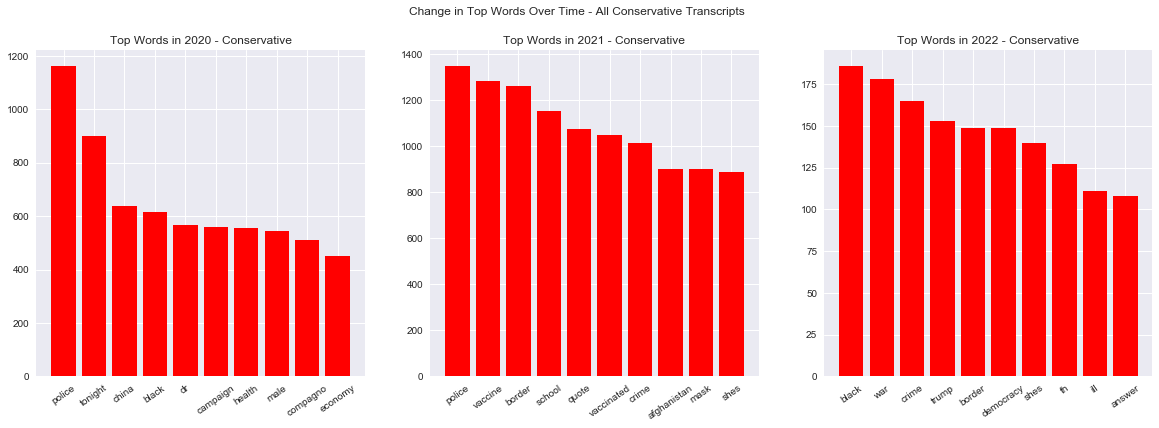

In [34]:
#create subplots
fig, axs = plt.subplots(1, 3, figsize=(20,6))

x_c_2020 = top_10_words_c_2020.keys()
y_c_2020 = top_10_words_c_2020.values()

x_c_2021 = top_10_words_c_2021.keys()
y_c_2021 = top_10_words_c_2021.values()

x_c_2022 = top_10_words_c_2022.keys()
y_c_2022 = top_10_words_c_2022.values()


fig.suptitle('Change in Top Words Over Time - All Conservative Transcripts')
#axs[0].plot(x_2020, y_2020, 'tab:orange')
axs[0].bar(x_c_2020,y_c_2020, color = 'red')#.xticks(rotation=45)
axs[0].set_title('Top Words in 2020 - Conservative')
axs[0].set_xticklabels(x_c_2020, rotation=35)


axs[1].bar(x_c_2021,y_c_2021, color = 'red')
axs[1].set_title('Top Words in 2021 - Conservative')
axs[1].set_xticklabels(x_c_2021, rotation=35)


axs[2].bar(x_c_2022,y_c_2022, color = 'red')
axs[2].set_title('Top Words in 2022 - Conservative')
axs[2].set_xticklabels(x_c_2022, rotation=35)

fig.savefig(repo_path +'/images/conservative-change-over-time-full.png')

### Year-Restricted Datasets -- Non-Zero COVID Mentions

In [35]:
# create a restricted transcript list including only transcripts that mention a COVID term at least one
#text_transcripts_2020
text_cov_c_2020 = [text_transcripts_c_2020[i] for i in range(len(text_transcripts_c_2020)) if covid_counts_transcripts_c_2020[i] > 0]
text_cov_c_2021 = [text_transcripts_c_2021[i] for i in range(len(text_transcripts_c_2021)) if covid_counts_transcripts_c_2021[i] > 0]
text_cov_c_2022 = [text_transcripts_c_2022[i] for i in range(len(text_transcripts_c_2022)) if covid_counts_transcripts_c_2022[i] > 0]


In [36]:
# had to create another countvec function because min_df was too high for 2022 data set. 
# Was getting error: "max_df corresponds to < documents than min_df"
def countvec_c_2(text_list):
    
    # step 1: set up the vectorizer
    vectorizer = CountVectorizer(min_df = 10, 
                                 stop_words = full_stop_words_c, 
                                 max_df = 0.8)
    
    # step 2: apply the vectorizer to the corpus of documents and store in document matrix X
    X = vectorizer.fit(text_list)
    
    # step 3: fit transform corpus of documents
    X_transformed = vectorizer.fit_transform(text_list)
    
    # step 4: extract feature names and counts, create dictionary
    array_of_words = vectorizer.get_feature_names() # Lori changed from get_featured_names_out() because her version of library doesn't have that function
    array_of_counts = X_transformed.toarray().sum(axis = 0)
    word_frequency_dictionary = dict(zip(array_of_words, array_of_counts))
    
    return(X, X_transformed, array_of_words, array_of_counts, word_frequency_dictionary)

In [37]:
# apply function to restricted list
X_cov_c_2020, X_transformed_cov_c_2020, array_of_words_trans_cov_c_2020, array_of_counts_trans_cov_c_2020, word_frequency_dictionary_trans_cov_c_2020 = countvec_c(text_cov_c_2020)
X_cov_c_2021, X_transformed_cov_c_2021, array_of_words_trans_cov_c_2021, array_of_counts_trans_cov_c_2021, word_frequency_dictionary_trans_cov_c_2021 = countvec_c(text_cov_c_2021)
X_cov_c_2022, X_transformed_cov_c_2022, array_of_words_trans_cov_c_2022, array_of_counts_trans_cov_c_2022, word_frequency_dictionary_trans_cov_c_2022 = countvec_c_2(text_cov_c_2022)

In [38]:
# set the number of top words to see
num_top_words = 10

top_10_words_cov_c_2020 = dict(sorted(word_frequency_dictionary_trans_cov_c_2020.items(), key = itemgetter(1), reverse = True)[:num_top_words])
top_10_words_cov_c_2021 = dict(sorted(word_frequency_dictionary_trans_cov_c_2021.items(), key = itemgetter(1), reverse = True)[:num_top_words])
top_10_words_cov_c_2022 = dict(sorted(word_frequency_dictionary_trans_cov_c_2022.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words_cov_c_2020)
print(top_10_words_cov_c_2021)
print(top_10_words_cov_c_2022)

{'police': 1145, 'tonight': 892, 'china': 638, 'black': 595, 'dr': 568, 'election': 556, 'health': 555, 'campaign': 553, 'male': 515, 'compagno': 481}
{'vaccine': 1281, 'police': 1232, 'border': 1193, 'school': 1121, 'vaccinated': 1039, 'quote': 1021, 'crime': 960, 'mask': 898, 'afghanistan': 849, 'children': 842}
{'black': 177, 'crime': 159, 'ukraine': 153, 'judge': 149, 'police': 143, 'quote': 135, 'trump': 134, 'democracy': 131, 'mask': 131, 'school': 129}


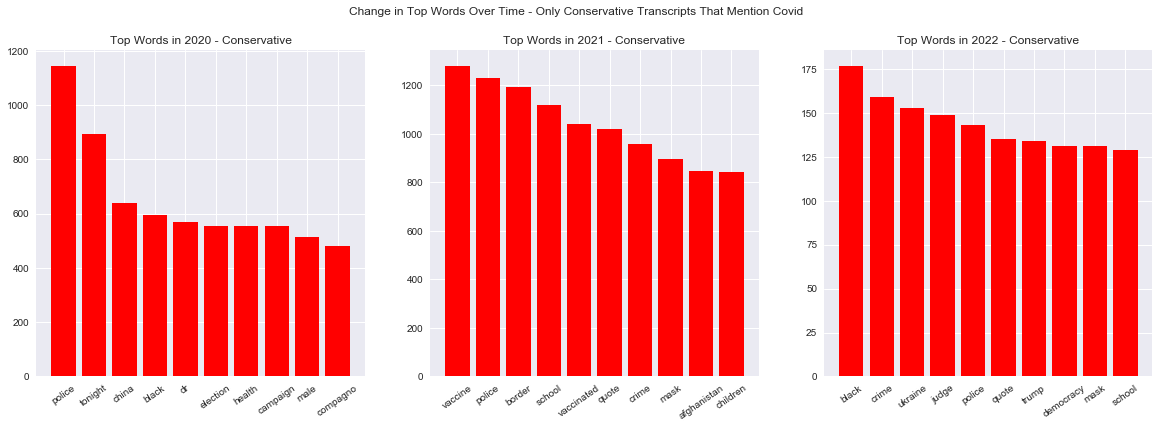

In [39]:
#create subplots
fig, axs = plt.subplots(1, 3, figsize=(20,6))

x_c_2020 = top_10_words_cov_c_2020.keys()
y_c_2020 = top_10_words_cov_c_2020.values()

x_c_2021 = top_10_words_cov_c_2021.keys()
y_c_2021 = top_10_words_cov_c_2021.values()

x_c_2022 = top_10_words_cov_c_2022.keys()
y_c_2022 = top_10_words_cov_c_2022.values()


fig.suptitle('Change in Top Words Over Time - Only Conservative Transcripts That Mention Covid')
#axs[0].plot(x_2020, y_2020, 'tab:orange')
axs[0].bar(x_c_2020,y_c_2020, color = 'red')#.xticks(rotation=45)
axs[0].set_title('Top Words in 2020 - Conservative')
axs[0].set_xticklabels(x_c_2020, rotation=35)


axs[1].bar(x_c_2021,y_c_2021, color = 'red')
axs[1].set_title('Top Words in 2021 - Conservative')
axs[1].set_xticklabels(x_c_2021, rotation=35)


axs[2].bar(x_c_2022,y_c_2022, color = 'red')
axs[2].set_title('Top Words in 2022 - Conservative')
axs[2].set_xticklabels(x_c_2022, rotation=35)

fig.savefig(repo_path +'/images/conservative-change-over-time-covid-only.png')


## Co-Occurence Analysis

- Need to do string cleaning. 
- For now, appearance anywhere in a transcript increases count by 1.
- it might make sense to do this with the count vectorizer from above?

In [40]:
# import packages
from collections import Counter
import spacy
import numpy as np

C:\Users\loriz\anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Transcript-Level Co-Occurrence

In [41]:
nlp = spacy.load('en_core_web_sm', disable = ['parser'])

In [42]:
%%time
conservative_nlp = [nlp(text) for text in text_transcripts_c]

Wall time: 9min 53s


In [43]:
# create counters
lemma_counter_c = Counter()
covid_co_counter_c = Counter()
covid_count_c = 0
mask_co_counter_c = Counter()
mask_count_c = 0
vaccine_co_counter_c = Counter()
vaccine_count_c = 0

# for each document, add unique lemmas to counter
# increase co-occurrence and covid counter if covid terms overlap lemma set
# same for mask terms, vaccine terms
for transcript in conservative_nlp:
    lemmas = {token.lemma_.lower() for token in transcript}
    lemma_counter_c.update(lemmas)
    if not lemmas.isdisjoint(set(covid_terms)):
        covid_co_counter_c.update(lemmas)
        covid_count_c += 1
    if not lemmas.isdisjoint(set(mask_terms)):
        mask_co_counter_c.update(lemmas)
        mask_count_c += 1
    if not lemmas.isdisjoint(set(vaccine_terms)):
        vaccine_co_counter_c.update(lemmas)
        vaccine_count_c += 1

In [44]:
# calculate COVID terms PMI
# P(covid)
covid_ratio_c = covid_count_c / len(conservative_nlp)

# calculate PMI only for words that co-occur
pmi_covid_c = list()
for lemma, count in covid_co_counter_c.items():
    
    lemma_ratio = lemma_counter_c[lemma] / len(conservative_nlp) # P(lemma)
    co_ratio = covid_co_counter_c[lemma] / len(conservative_nlp) # P(covid, lemma)
    
    # store lemma, total lemma count, co-occur count, and PMI
    pmi_covid_c += [(lemma, lemma_counter_c[lemma], covid_co_counter_c[lemma], 
                   np.log2(co_ratio / (covid_ratio_c * lemma_ratio)))]

# sort list of tuples by pmi then by lemma count, descending
pmi_covid_sort_c = sorted(pmi_covid_c, key = lambda x: [round(x[3], 5), x[1]], reverse = True)

In [45]:
# calculate mask terms PMI
# P(mask)
mask_ratio_c = mask_count_c / len(conservative_nlp)

# calculate PMI only for words that co-occur
pmi_mask_c = list()
for lemma, count in mask_co_counter_c.items():
    
    lemma_ratio = lemma_counter_c[lemma] / len(conservative_nlp) # P(lemma)
    co_ratio = mask_co_counter_c[lemma] / len(conservative_nlp) # P(mask, lemma)
    
    # store lemma, total lemma count, co-occur count, and PMI
    pmi_mask_c += [(lemma, lemma_counter_c[lemma], mask_co_counter_c[lemma], 
                   np.log2(co_ratio / (mask_ratio_c * lemma_ratio)))]

# sort list of tuples by pmi then by lemma count, descending
pmi_mask_sort_c = sorted(pmi_mask_c, key = lambda x: [round(x[3], 5), x[1]], reverse = True)

In [46]:
# calculate vaccine terms PMI
# P(vaccine)
vaccine_ratio_c = vaccine_count_c / len(conservative_nlp)

# calculate PMI only for words that co-occur
pmi_vaccine_c = list()
for lemma, count in vaccine_co_counter_c.items():
    
    lemma_ratio = lemma_counter_c[lemma] / len(conservative_nlp) # P(lemma)
    co_ratio = vaccine_co_counter_c[lemma] / len(conservative_nlp) # P(vaccine, lemma)
    
    # store lemma, total lemma count, co-occur count, and PMI
    pmi_vaccine_c += [(lemma, lemma_counter_c[lemma], vaccine_co_counter_c[lemma], 
                   np.log2(co_ratio / (vaccine_ratio_c * lemma_ratio)))]

# sort list of tuples by pmi then by lemma count, descending
pmi_vaccine_sort_c = sorted(pmi_vaccine_c, key = lambda x: [round(x[3], 5), x[1]], reverse = True)

In [47]:
# print top 100 words (by PMI) that co-occur with COVID terms
counter_c = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_covid_sort_c:
    if (lemma[0] not in full_stop_words_c) and (lemma[0] not in covid_terms) and (counter_c < 100):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter_c += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
science                   250             250             0.07765        
lockdown                  148             148             0.07765        
infect                    136             136             0.07765        
infection                 118             118             0.07765        
criticism                 107             107             0.07765        
quarantine                102             102             0.07765        
testing                   102             102             0.07765        
infectious                98              98              0.07765        
scientific                94              94              0.07765        
distancing                92              92              0.07765        
boss                      89              89              0.07765        
cdc                       89             

In [48]:
# print top 100 words (by PMI) that co-occur with COVID terms given that lemma count > 300
counter_c = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_covid_sort_c:
    if (lemma[0] not in full_stop_words_c) and (lemma[0] not in covid_terms) and (counter_c < 100) and (lemma[1] > 300):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter_c += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
mask                      331             329             0.06891        
governor                  318             312             0.05017        
pandemic                  337             330             0.04737        
health                    332             325             0.04691        
wear                      329             319             0.03312        
company                   309             299             0.03019        
federal                   336             325             0.02963        
death                     342             330             0.02612        
free                      348             335             0.02273        
decision                  314             302             0.02144        
claim                     339             326             0.02124        
quote                     331            

In [49]:
# print top 100 words (by PMI) that co-occur with mask terms
counter_c = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_mask_sort_c:
    if (lemma[0] not in full_stop_words_c) and (lemma[0] not in mask_terms) and (counter_c < 100):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter_c += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
maskless                  32              32              0.45983        
surgical                  17              17              0.45983        
attendant                 17              17              0.45983        
bowser                    16              16              0.45983        
illusion                  16              16              0.45983        
declassify                16              16              0.45983        
facemask                  15              15              0.45983        
covering                  14              14              0.45983        
muriel                    14              14              0.45983        
amtrak                    14              14              0.45983        
disobey                   13              13              0.45983        
patron                    13             

In [50]:
# print top 100 words (by PMI) that co-occur with mask terms given that lemma count > 300
counter_c = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_mask_sort_c:
    if (lemma[0] not in full_stop_words_c) and (lemma[0] not in mask_terms) and (counter_c < 100) and (lemma[1] > 300):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter_c += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
wear                      329             286             0.25775        
pandemic                  337             266             0.1185         
governor                  318             251             0.11849        
covid                     392             307             0.10721        
health                    332             260             0.10715        
company                   309             239             0.08923        
federal                   336             258             0.07874        
outside                   316             242             0.07491        
shut                      307             235             0.07425        
sort                      326             247             0.05946        
republican                371             281             0.05898        
business                  366            

In [51]:
# print top 100 words (by PMI) that co-occur with vaccine terms
counter_c = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_vaccine_sort_c:
    if (lemma[0] not in full_stop_words_c) and (lemma[0] not in vaccine_terms) and (counter_c < 100):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter_c += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
unvaccinated              79              79              0.57242        
unvaccinate               31              31              0.57242        
neurotic                  17              17              0.57242        
jab                       17              17              0.57242        
antivaxxer                17              17              0.57242        
boris                     16              16              0.57242        
hesitancy                 15              15              0.57242        
positivity                14              14              0.57242        
antivax                   14              14              0.57242        
neanderthal               14              14              0.57242        
georgetown                13              13              0.57242        
punitive                  13             

In [52]:
# print top 100 words (by PMI) that co-occur with vaccine terms given that lemma count > 300
counter_c = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_vaccine_sort_c:
    if (lemma[0] not in full_stop_words_c) and (lemma[0] not in vaccine_terms) and (counter_c < 100) and (lemma[1] > 300):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter_c += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
mask                      331             249             0.16173        
covid                     392             286             0.11758        
media                     327             238             0.11409        
administration            374             270             0.10234        
wear                      329             237             0.09922        
pandemic                  337             242             0.09468        
governor                  318             228             0.09242        
company                   309             221             0.08886        
rule                      314             224             0.08515        
open                      371             264             0.08154        
health                    332             236             0.08002        
u                         357            

## Sentence-Level Co-Occurrence

In [53]:
# instantiate nlp
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser'])

In [54]:
# split sentences into batches
text_sentences_c_batches = np.array_split(text_sentences_c, 10)

In [55]:
%%time
# nlp parse batches
nlp_list_sen_c = []
for batch in text_sentences_c_batches:
    print('working') # will print 10 times total
    for sentence in batch:
        nlp_list_sen_c.append(nlp(str(sentence)))

working
working
working
working
working
working
working
working
working
working
Wall time: 38min 59s


In [56]:
# create counters
lemma_counter_c = Counter()
covid_co_counter_c = Counter()
covid_count_c = 0
mask_co_counter_c = Counter()
mask_count_c = 0
vaccine_co_counter_c = Counter()
vaccine_count_c = 0

# for each document, add unique lemmas to counter
# increase co-occurrence and covid counter if covid terms overlap lemma set
# same for mask terms, vaccine terms
for sentence in nlp_list_sen_c:
    lemmas = {token.lemma_.lower() for token in sentence}
    lemma_counter_c.update(lemmas)
    if not lemmas.isdisjoint(set(covid_terms)):
        covid_co_counter_c.update(lemmas)
        covid_count_c += 1
    if not lemmas.isdisjoint(set(mask_terms)):
        mask_co_counter_c.update(lemmas)
        mask_count_c += 1
    if not lemmas.isdisjoint(set(vaccine_terms)):
        vaccine_co_counter_c.update(lemmas)
        vaccine_count_c += 1

In [57]:
# calculate COVID term PMI
# P(covid)
covid_ratio_c = covid_count_c / len(nlp_list_sen_c)

# calculate PMI only for words that co-occur
pmi_covid_c = list()
for lemma, count in covid_co_counter_c.items():
    
    lemma_ratio = lemma_counter_c[lemma] / len(nlp_list_sen_c) # P(lemma)
    co_ratio = covid_co_counter_c[lemma] / len(nlp_list_sen_c) # P(covid, lemma)
    
    # store lemma, total lemma count, co-occur count, and PMI
    pmi_covid_c += [(lemma, lemma_counter_c[lemma], covid_co_counter_c[lemma], 
                   np.log2(co_ratio / (covid_ratio_c * lemma_ratio)))]

# sort list of tuples by pmi then by lemma count, descending
pmi_covid_sort_c = sorted(pmi_covid_c, key = lambda x: [round(x[3], 5), x[1]], reverse = True)

In [58]:
# calculate mask term PMI
# P(mask)
mask_ratio_c = mask_count_c / len(nlp_list_sen_c)

# calculate PMI only for words that co-occur
pmi_mask_c = list()
for lemma, count in mask_co_counter_c.items():
    
    lemma_ratio = lemma_counter_c[lemma] / len(nlp_list_sen_c) # P(lemma)
    co_ratio = mask_co_counter_c[lemma] / len(nlp_list_sen_c) # P(mask, lemma)
    
    # store lemma, total lemma count, co-occur count, and PMI
    pmi_mask_c += [(lemma, lemma_counter_c[lemma], mask_co_counter_c[lemma], 
                   np.log2(co_ratio / (mask_ratio_c * lemma_ratio)))]

# sort list of tuples by pmi then by lemma count, descending
pmi_mask_sort_c = sorted(pmi_mask_c, key = lambda x: [round(x[3], 5), x[1]], reverse = True)

In [59]:
# calculate vaccine term PMI
# P(vaccine)
vaccine_ratio_c = vaccine_count_c / len(nlp_list_sen_c)

# calculate PMI only for words that co-occur
pmi_vaccine_c = list()
for lemma, count in vaccine_co_counter_c.items():
    
    lemma_ratio = lemma_counter_c[lemma] / len(nlp_list_sen_c) # P(lemma)
    co_ratio = vaccine_co_counter_c[lemma] / len(nlp_list_sen_c) # P(vaccine, lemma)
    
    # store lemma, total lemma count, co-occur count, and PMI
    pmi_vaccine_c += [(lemma, lemma_counter_c[lemma], vaccine_co_counter_c[lemma], 
                   np.log2(co_ratio / (vaccine_ratio_c * lemma_ratio)))]

# sort list of tuples by pmi then by lemma count, descending
pmi_vaccine_sort_c = sorted(pmi_vaccine_c, key = lambda x: [round(x[3], 5), x[1]], reverse = True)

In [60]:
# print top 100 words (by PMI) that co-occur with COVID terms
counter_c = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_covid_sort_c:
    if (lemma[0] not in full_stop_words_c) and (lemma[0] not in covid_terms) and (counter_c < 100):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter_c += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
mainline                  459             459             6.03477        
artificially              4               4               6.03477        
combining                 3               3               6.03477        
mer                       3               3               6.03477        
orthopedist               2               2               6.03477        
karam                     2               2               6.03477        
transmissibility          2               2               6.03477        
frontal                   2               2               6.03477        
wellcontrolle             2               2               6.03477        
raoult                    2               2               6.03477        
didi                      2               2               6.03477        
rubella                   2              

In [61]:
# print top 100 words (by PMI) that co-occur with COVID terms given that lemma count > 300
counter_c = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_covid_sort_c:
    if (lemma[0] not in full_stop_words_c) and (lemma[0] not in covid_terms) and (counter_c < 100) and (lemma[1] > 300):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter_c += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
mainline                  459             459             6.03477        
sceptical                 461             459             6.0285         
auto                      476             459             5.9823         
freak                     542             461             5.80124        
regardless                558             465             5.77174        
briefing                  710             505             5.54323        
presidential              847             471             5.18814        
trial                     878             473             5.14239        
elect                     887             467             5.10926        
novel                     974             478             5.00786        
wuhan                     332             158             4.96351        
february                  1110           

In [62]:
# print top 100 words (by PMI) that co-occur with mask terms
counter_c = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_mask_sort_c:
    if (lemma[0] not in full_stop_words_c) and (lemma[0] not in mask_terms) and (counter_c < 100):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter_c += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
thrice                    4               4               7.21898        
reimplemente              2               2               7.21898        
kn                        2               2               7.21898        
wearer                    2               2               7.21898        
nylon                     2               2               7.21898        
feuding                   2               2               7.21898        
nakedness                 1               1               7.21898        
immolate                  1               1               7.21898        
preston                   1               1               7.21898        
kooky                     1               1               7.21898        
expressionless            1               1               7.21898        
promasker                 1              

In [63]:
# print top 100 words (by PMI) that co-occur with mask terms given that lemma count > 300
counter_c = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_mask_sort_c:
    if (lemma[0] not in full_stop_words_c) and (lemma[0] not in mask_terms) and (counter_c < 100) and (lemma[1] > 300):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter_c += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
untruth                   460             459             7.21584        
decisively                464             459             7.20335        
acceptance                473             460             7.17878        
birx                      551             460             6.95856        
wash                      566             470             6.95084        
wear                      1772            1328            6.80286        
main                      618             460             6.79301        
mandate                   1228            669             6.34275        
february                  1110            461             5.95126        
thousand                  1145            469             5.93129        
speech                    1164            467             5.90139        
hand                      1322           

In [64]:
# print top 100 words (by PMI) that co-occur with vaccine terms
counter_c = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_vaccine_sort_c:
    if (lemma[0] not in full_stop_words_c) and (lemma[0] not in vaccine_terms) and (counter_c < 100):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter_c += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
modernas                  2               2               7.55912        
bancel                    2               2               7.55912        
stephane                  2               2               7.55912        
pfizerbiontech            2               2               7.55912        
compulsory                2               2               7.55912        
rna                       2               2               7.55912        
sms                       2               2               7.55912        
pericarditis              2               2               7.55912        
datalink                  2               2               7.55912        
promandate                2               2               7.55912        
achievable                2               2               7.55912        
sanofi                    2              

In [65]:
# print top 100 words (by PMI) that co-occur with vaccine terms given that lemma count > 300
counter_c = 0
print('{:<25} {:<15} {:<15} {:<15}'.format('Word', 'Word Count', 'Co-Occur Count', 'PMI'))
print('-' * 70)
for lemma in pmi_vaccine_sort_c:
    if (lemma[0] not in full_stop_words_c) and (lemma[0] not in vaccine_terms) and (counter_c < 100) and (lemma[1] > 300):
        print('{:<25} {:<15} {:<15} {:<15}'.format(lemma[0], lemma[1], lemma[2], round(lemma[3], 5)))
        counter_c += 1

Word                      Word Count      Co-Occur Count  PMI            
----------------------------------------------------------------------
mandate                   1228            254             5.28571        
require                   350             50              4.75176        
vaccinate                 791             105             4.64583        
effect                    440             51              4.45019        
rate                      504             55              4.3632         
covid                     3293            337             4.27054        
shot                      947             91              4.17969        
employee                  318             25              3.89009        
refuse                    370             28              3.83509        
spread                    610             46              3.83002        
likely                    383             27              3.73281        
datum                     475            

# Topic Modeling

In [66]:
from sklearn.decomposition import LatentDirichletAllocation

## Full Transcript Set

In [67]:
%%time
# vary number of topics
for k in [4, 6, 8, 10, 12]:
    
    lda = LatentDirichletAllocation(n_components = k, 
                                    random_state = 0)

    lda.fit(X_transformed_trans_c)
    
    topic_word_dist = np.array([row / row.sum() for row in lda.components_])
    
    print('-' * 50)
    print('Number of topics:', k)
    
    # list top 20 words in each topic
    for topic_idx in range(k):
        print('\n', 'Topic ', topic_idx, ':', sep = '')
        sort_idx = np.argsort(-topic_word_dist[topic_idx])
        for rank in range(20):
            word_idx = sort_idx[rank]
            print('{:<80} {:<10}'.format(array_of_words_trans_c[word_idx], topic_word_dist[topic_idx, word_idx]))

--------------------------------------------------
Number of topics: 4

Topic 0:
afghanistan                                                                      0.01622655614671032
taliban                                                                          0.011127366375849379
military                                                                         0.008408319216347205
ukraine                                                                          0.006750392500273258
war                                                                              0.005914731025403962
russia                                                                           0.0058539560793934575
montgomery                                                                       0.005702702624215285
putin                                                                            0.004678618509137832
administration                                                                   0.004519888436519274
a

In [68]:
# fit with 10 topics
num_topics = 10

lda_c = LatentDirichletAllocation(n_components = num_topics, 
                                random_state = 0)

lda_c.fit(X_transformed_trans_c)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [69]:
# normalize to get probability distributions
topic_word_dist_c = np.array([row / row.sum() for row in lda_c.components_])

In [70]:
# list top 20 words in each topic
for topic_idx in range(num_topics):
    print('\n', 'Topic ', topic_idx, ':', sep = '')
    sort_idx = np.argsort(-topic_word_dist[topic_idx])
    for rank in range(20):
        word_idx = sort_idx[rank]
        print('{:<80} {:<10}'.format(array_of_words_trans_c[word_idx], topic_word_dist[topic_idx, word_idx]))


Topic 0:
afghanistan                                                                      0.028533729931826863
taliban                                                                          0.020254103193683228
military                                                                         0.011676583712696356
afghan                                                                           0.008134866181476432
war                                                                              0.005573840891041917
airport                                                                          0.005493318949157283
troops                                                                           0.005257818794768078
administration                                                                   0.005104104704427061
secretary                                                                        0.004762217146533122
kabul                                                                   

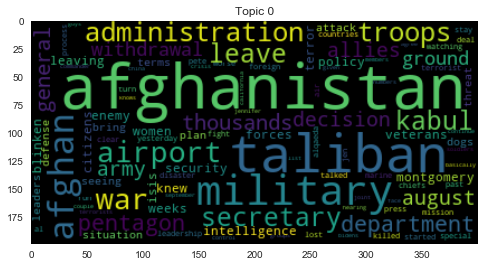

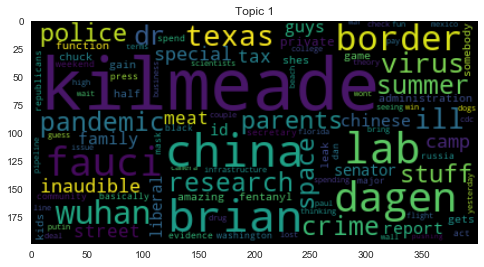

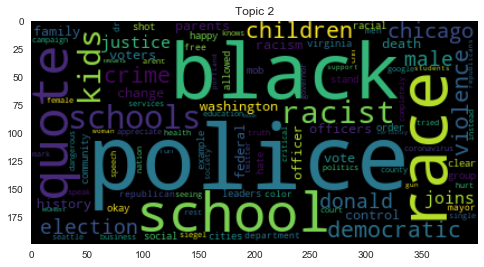

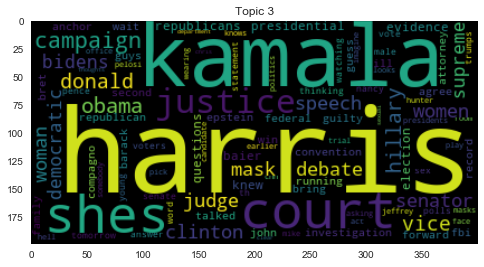

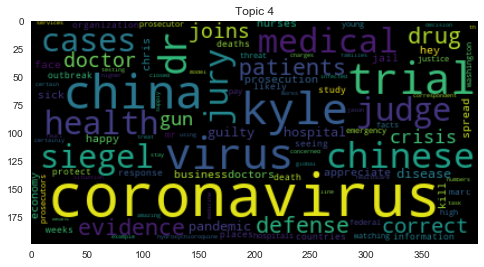

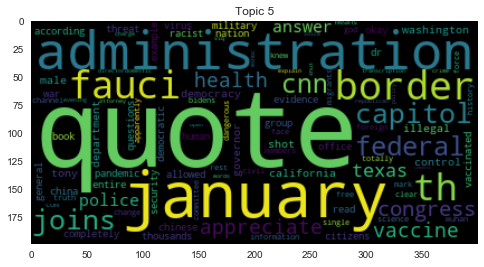

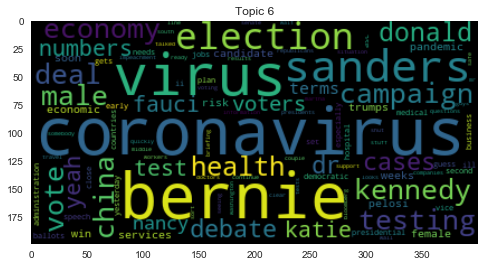

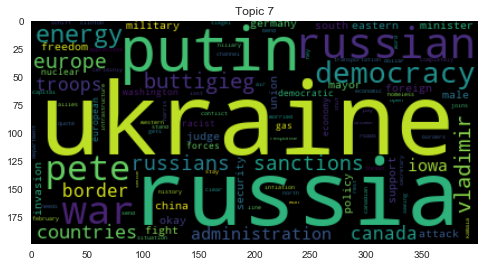

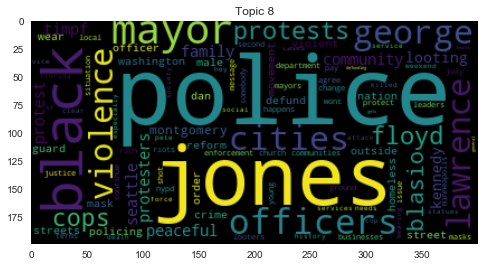

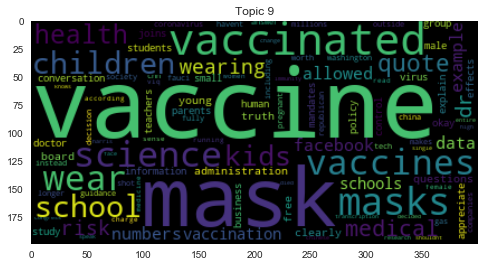

In [71]:
from wordcloud import WordCloud

for topic_idx in range(num_topics):
    wc = WordCloud(max_words = 100)
    wc.generate_from_frequencies(dict(zip(array_of_words_trans_c, topic_word_dist[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation = 'bilinear')
    plt.title('Topic %d' % topic_idx)
    plt.grid(visible = None)

## Restricted Transcript Set - Nonzero COVID Mentions

In [72]:
%%time
# vary number of topics
for k in [9, 12, 15]:
    
    lda = LatentDirichletAllocation(n_components = k, 
                                    random_state = 0)

    lda.fit(X_transformed_trans_cov_c)
    
    topic_word_dist = np.array([row / row.sum() for row in lda.components_])
    
    print('-' * 50)
    print('Number of topics:', k)
    
    # list top 20 words in each topic
    for topic_idx in range(k):
        print('\n', 'Topic ', topic_idx, ':', sep = '')
        sort_idx = np.argsort(-topic_word_dist[topic_idx])
        for rank in range(20):
            word_idx = sort_idx[rank]
            print('{:<80} {:<10}'.format(array_of_words_trans_c[word_idx], topic_word_dist[topic_idx, word_idx]))

--------------------------------------------------
Number of topics: 9

Topic 0:
primary                                                                          0.005549994362694419
instagram                                                                        0.0035396891527221643
international                                                                    0.0034994209120562778
study                                                                            0.003138612110187535
passed                                                                           0.003102034132618817
decline                                                                          0.0029360569024645088
resign                                                                           0.0027645994886330927
class                                                                            0.0026922954512834324
tweet                                                                            0.002645519406892

In [73]:
# fit with 15 topics
num_topics = 15

lda_c = LatentDirichletAllocation(n_components = num_topics, 
                                random_state = 0)

lda_c.fit(X_transformed_trans_cov_c)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=15, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [74]:
# normalize to get probability distributions
topic_word_dist_c = np.array([row / row.sum() for row in lda_c.components_])

In [75]:
# list top 20 words in each topic
for topic_idx in range(num_topics):
    print('\n', 'Topic ', topic_idx, ':', sep = '')
    sort_idx = np.argsort(-topic_word_dist[topic_idx])
    for rank in range(20):
        word_idx = sort_idx[rank]
        print('{:<80} {:<10}'.format(array_of_words_trans_cov_c[word_idx], topic_word_dist[topic_idx, word_idx]))


Topic 0:
quote                                                                            0.006199066861492419
january                                                                          0.004886535829591327
th                                                                               0.00427510408620951
capitol                                                                          0.0038889624363858803
joins                                                                            0.003648570409947898
federal                                                                          0.0034570339243435656
cnn                                                                              0.003349197004627811
appreciate                                                                       0.002908948957335911
congress                                                                         0.002851175336715716
washington                                                             

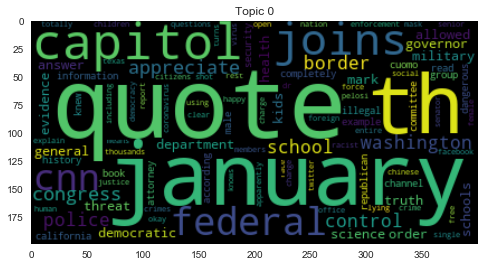

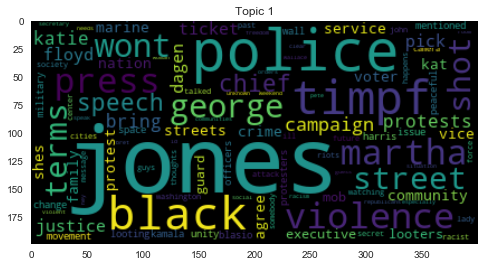

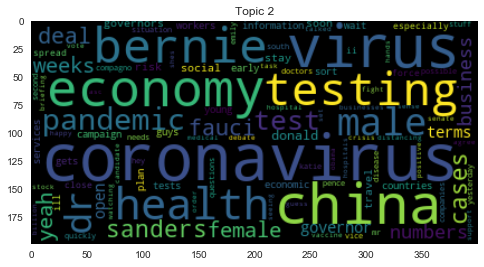

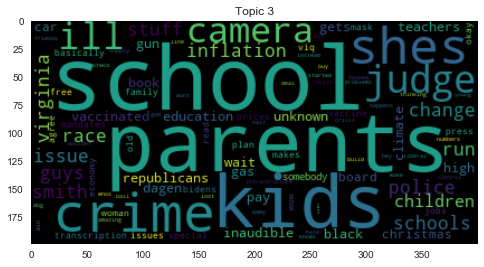

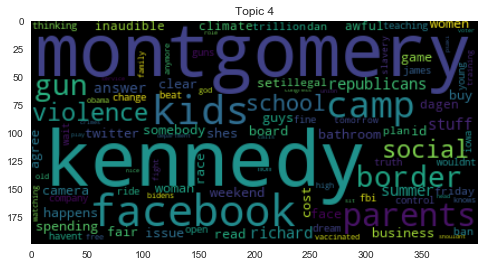

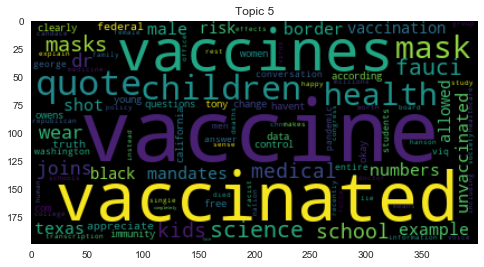

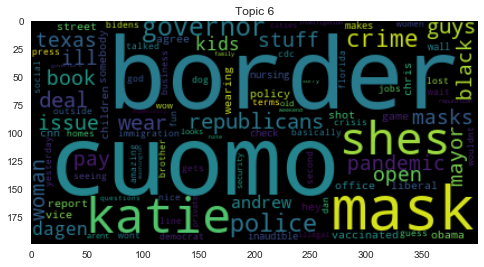

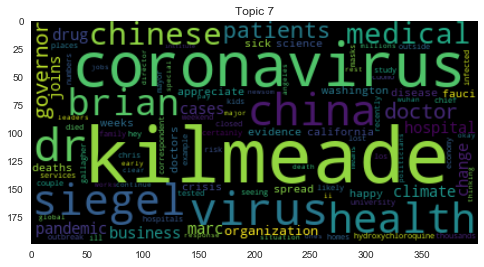

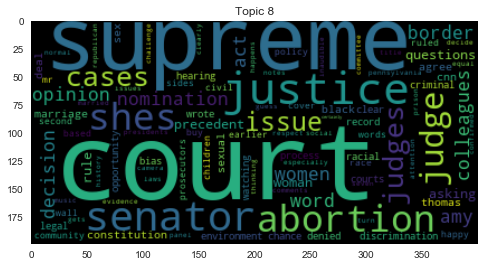

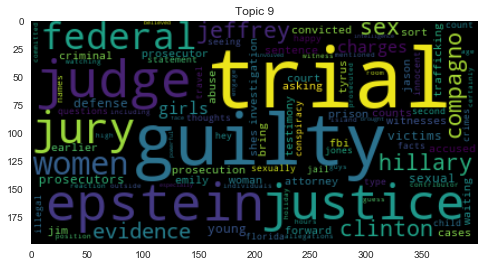

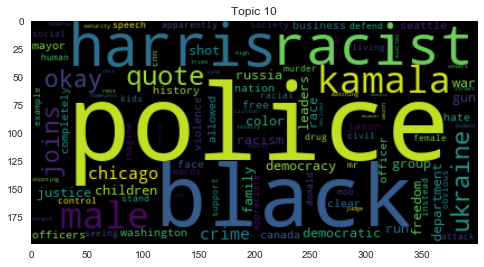

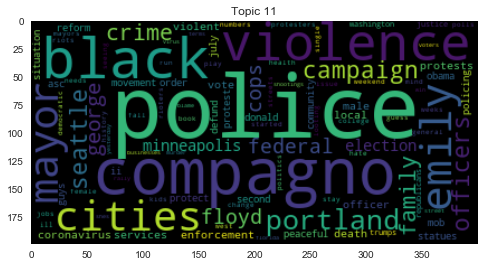

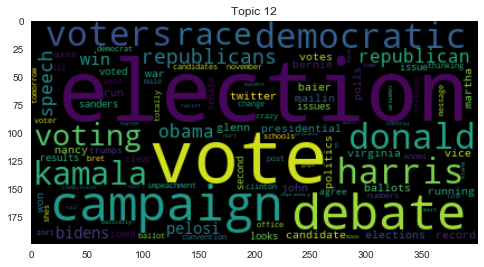

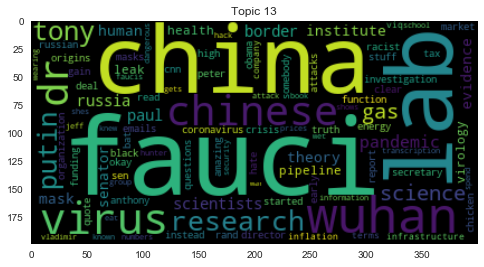

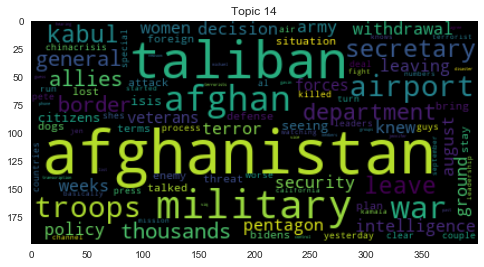

In [76]:
from wordcloud import WordCloud

for topic_idx in range(num_topics):
    wc = WordCloud(max_words = 100)
    wc.generate_from_frequencies(dict(zip(array_of_words_trans_cov_c, topic_word_dist[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation = 'bilinear')
    plt.title('Topic %d' % topic_idx)
    plt.grid(visible = None)

## Sentiment Analysis

### Step 1: Subset the List of Sentences To Just Those That Include COVID Terms 

In [95]:
covid_sentences_conservative = [sentence for sentence in text_sentences_c if any(word in sentence for word in covid_terms)]

### Step 2: Apply the Sentiment Analyzer

In [107]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

#define a function to run the sentiment analysis
def apply_sentiment_analysis(covid_sentences):
    total_compound_scores = []
    positive_sentences = []
    negative_sentences = []
    neutral_sentences = []
    #first 5 sentences test
    for sentence in covid_sentences:
        score = sia.polarity_scores(sentence)
        compound_score = score["compound"]
        total_compound_scores.append(compound_score)

        if compound_score == 0:
            neutral_sentences.append((sentence, score))
        elif compound_score > 0:
            positive_sentences.append((sentence, score))
        else: 
            negative_sentences.append((sentence, score))


    return total_compound_scores, positive_sentences, negative_sentences, neutral_sentences

In [108]:
#store all of the results from running sentiment analysis
total_compound_scores_conservative, positive_sentences_conservative, negative_sentences_conservative, neutral_sentences_conservative = apply_sentiment_analysis(covid_sentences_conservative)

### Step 3: Plot The Distribution of Sentence Sentiments

In [109]:
from matplotlib.ticker import PercentFormatter
#create a function for ploting
def plot_sentiment_dist(positive, neutral, negative, pol_color, plot_title):

    fig = plt.figure() #added by Tobi to extract the graphics
    total_num_sentences = len(positive + neutral + negative)

    plt.style.use('seaborn')  

    x = ["positive", "neutral", "negative"]
    y = [len(positive)/total_num_sentences, len(neutral)/total_num_sentences, len(negative)/total_num_sentences]
    plt.bar(x,y, color = pol_color)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1)) #make the y-axis a percent
    plt.xlabel('Sentiment')
    #plt.xticks(rotation=45)
    plt.ylabel('Percent of Total Setences')
    plt.title(plot_title + " (Total Sentences = {:,})".format(total_num_sentences) )

    plt.show()

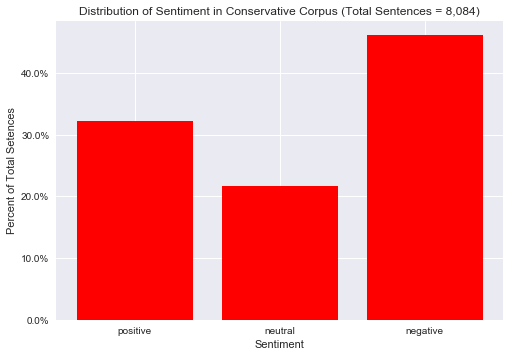

In [110]:
#plot the conservative sentiment analysis distribution
plot_sentiment_dist(positive_sentences_conservative, neutral_sentences_conservative, negative_sentences_conservative, "red", 'Distribution of Sentiment in Conservative Corpus')


In [112]:
positive_sentences_sort_conservative = sorted(positive_sentences_conservative, key = lambda x: x[1]["pos"], reverse = True)

top_10_positive_sentences_conservative = positive_sentences_sort_conservative[:10]

top_10_positive_sentences_conservative_only = [sentence for sentence, score in top_10_positive_sentences_conservative]

for idx, sentences in enumerate(top_10_positive_sentences_conservative_only):
    # print(idx, liberal_sentence, conservative_sentence)
    # sentence, score = combo
    #print(sentences)
    print("{}. {} \n".format(idx+1, sentences))


1. like a virus 

2. covid numbers his approval ratings on covid was pretty good 

3. employees positive for coronavirus 

4. but like its a virus 

5. trillion covid relief bill 

6. trillion covid relief package 

7. well covid is their never ending existential crisis 

8. and hes like yes i got a covid shot too 

9. and its like like some viruses its incurable 

10. intelligence community agree that this coronavirus was not manmade 



In [114]:
negative_sentences_sort_conservative = sorted(negative_sentences_conservative, key = lambda x: x[1]["pos"], reverse = True)

top_10_negative_sentences_conservative = negative_sentences_sort_conservative[:10]

top_10_negative_sentences_conservative_only = [sentence  for sentence, score in top_10_negative_sentences_conservative]

for idx, sentences in enumerate(top_10_negative_sentences_conservative_only):
    print("{}. {} \n".format(idx+1, sentences))


1. a chinese flu virus please 

2. i have the freedom to kill you with my covid 

3. patricia cornwall was clearly very talented but two years of insane coronavirus restrictions broke her spirit 

4. the framing of the fight against coronavirus as a war and america always wins wars was very effective 

5. cain deny covid exist gutfeld yes deny 

6. he didnt die of the coronavirus but he died certainly because of the covid virus 

7. some viruses spread through good intentions gone bad 

8. if you are vaccinated and boosted you may get covid but you are highly protected against severe illness 

9. its in its best state for fighting a war like this one even a war against something as microscopic as a virus 

10. we have a smoking gun in the original coronavirus 



## LDA Analysis on Positive and Negative Transcripts Subset

### LDA for the Transcripts Containing Positive Sentences

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from operator import itemgetter

In [88]:
# step 1: set up the vectorizer
#min_df_threshold = int(np.floor(0.05 * len(text_transcripts)))
vectorizer_c = CountVectorizer(#min_df = min_df_threshold,  #there are already much fewer transcripts + words in the cdc corpus, so I just made the rule that a word need to occur in at least a 1/3 of the documents to be counted
                                stop_words = full_stop_words_c)
                               #max_df = 0.8)

# step 2: apply the vectorizer to the corpus of documents and store in document matrix X
X_c = vectorizer_c.fit(positive_transcripts_c)

# step 3: fit transform corpus of documents
X_pos_trans_c = vectorizer_c.fit_transform(positive_transcripts_c)

# step 4: extract feature names and counts, create dictionary
array_of_words_c = vectorizer_c.get_feature_names()
array_of_counts_c = X_pos_trans_c.toarray().sum(axis = 0)
word_frequency_dictionary_c = dict(zip(array_of_words_c, array_of_counts_c))


In [89]:
print("There are {:,} unique words in the vocabulary.".format(X_pos_trans_c.shape[1]))

There are 1,349 unique words in the vocabulary.


In [90]:
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

--------------------------------------------------
Number of topics: 3


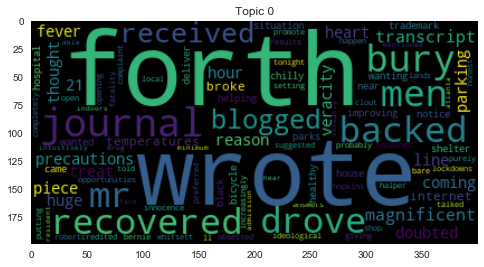

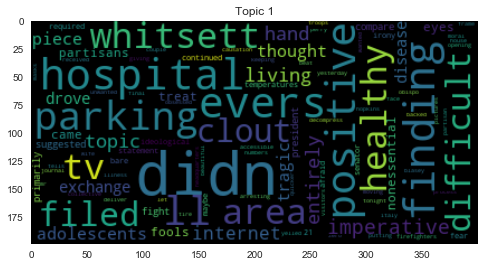

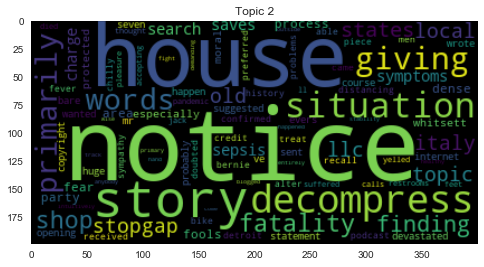

In [91]:
#for topic_idx in [2,3,4,5]:

   # num_topics = 3

topic_idx = 3     
lda_c = LatentDirichletAllocation(n_components = topic_idx, 
                                random_state = 0)

lda_c.fit(X_pos_trans_c)

topic_word_dist_c = np.array([row / row.sum() for row in lda_c.components_])

print('-' * 50)
print('Number of topics:', topic_idx)

# list top 20 words in each topic
for topic_idx in range(topic_idx):
    # print('\n', 'Topic ', topic_idx, ':', sep = '')
    # sort_idx = np.argsort(-topic_word_dist[topic_idx])
    # for rank in range(20):
    #     word_idx = sort_idx[rank]
    #     print('{:<80} {:<10}'.format(array_of_words[word_idx], topic_word_dist[topic_idx, word_idx]))


#for topic_idx in range(num_topics):
    wc = WordCloud(max_words = 100)
    wc.generate_from_frequencies(dict(zip(array_of_words_c, topic_word_dist[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation = 'bilinear')
    plt.title('Topic %d' % topic_idx)
    plt.grid(visible = None)

### LDA for the Transcripts Containing Negative Sentences

In [92]:
# step 1: set up the vectorizer
#min_df_threshold = int(np.floor(0.3 * len(text_transcripts)))
vectorizer_c = CountVectorizer(#min_df = min_df_threshold,  #there are already much fewer transcripts + words in the cdc corpus, so I just made the rule that a word need to occur in at least a 1/3 of the documents to be counted
                                stop_words = full_stop_words_c)
                               # max_df = 0.8)

# step 2: apply the vectorizer to the corpus of documents and store in document matrix X
X_c = vectorizer_c.fit(negative_transcripts_c)

# step 3: fit transform corpus of documents
X_neg_trans_c = vectorizer_c.fit_transform(negative_transcripts_c)

# step 4: extract feature names and counts, create dictionary
array_of_words_c = vectorizer_c.get_feature_names()
array_of_counts_c = X_neg_trans_c.toarray().sum(axis = 0)
word_frequency_dictionary_c = dict(zip(array_of_words_c, array_of_counts_c))


In [93]:
print("There are {:,} unique words in the vocabulary.".format(X_neg_trans_c.shape[1]))

There are 37,079 unique words in the vocabulary.


--------------------------------------------------
Number of topics: 3


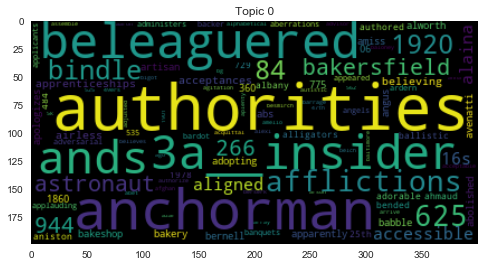

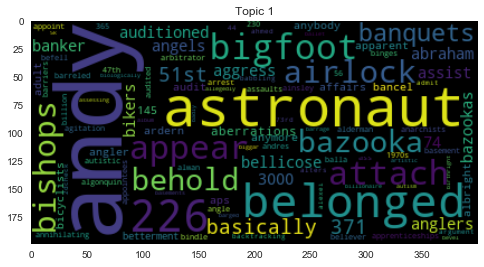

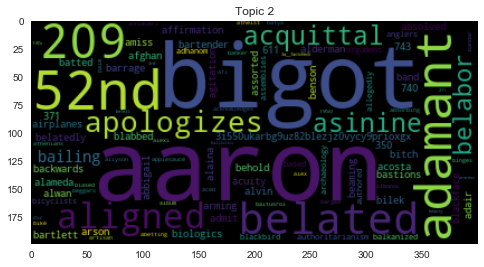

In [94]:
#for topic_idx in [2,3,4,5]:

   # num_topics = 3

topic_idx = 3      
lda_c = LatentDirichletAllocation(n_components = topic_idx, 
                                random_state = 0)

lda_c.fit(X_neg_trans_c)

topic_word_dist_c = np.array([row / row.sum() for row in lda_c.components_])

print('-' * 50)
print('Number of topics:', topic_idx)

# list top 20 words in each topic
for topic_idx in range(topic_idx):
    # print('\n', 'Topic ', topic_idx, ':', sep = '')
    # sort_idx = np.argsort(-topic_word_dist[topic_idx])
    # for rank in range(20):
        # word_idx = sort_idx[rank]
        # print('{:<80} {:<10}'.format(array_of_words[word_idx], topic_word_dist[topic_idx, word_idx]))


#for topic_idx in range(num_topics):
    wc = WordCloud(max_words = 100)
    wc.generate_from_frequencies(dict(zip(array_of_words_c, topic_word_dist[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation = 'bilinear')
    plt.title('Topic %d' % topic_idx)
    plt.grid(visible = None)